In [1678]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import datetime

import seaborn as sns

In [1679]:
start = pd.to_datetime('2007-02-04')
end = pd.to_datetime('2020-11-23')

In [1680]:
df = data.DataReader('SPY', 'yahoo', start, end)
df['Middle Band'] = df['Close'].rolling(window=20).mean()
df['Lower Band'] = df['Middle Band'] - 1.96 * df['Close'].rolling(window=20).std()
df['Upper Band'] = df['Middle Band'] + 1.96 * df['Close'].rolling(window=20).std()
df.head(20)

,High,Low,Open,Close,Volume,Adj Close,Middle Band,Lower Band,Upper Band
Date,,,,,,,,,
2007-02-05,144.940002,144.339996,144.699997,144.850006,45705300.0,109.564392,NaN,NaN,NaN
2007-02-06,145.029999,144.330002,144.970001,144.889999,57081300.0,109.594658,NaN,NaN,NaN
2007-02-07,145.360001,144.570007,145.119995,145.210007,55669700.0,109.836716,NaN,NaN,NaN
2007-02-08,145.119995,144.270004,144.779999,145.020004,70641000.0,109.692993,NaN,NaN,NaN
2007-02-09,145.330002,143.389999,145.059998,143.940002,79084400.0,108.876068,NaN,NaN,NaN
2007-02-12,144.039993,143.190002,143.940002,143.449997,65657000.0,108.505447,NaN,NaN,NaN
2007-02-13,144.899994,143.759995,143.770004,144.660004,64081800.0,109.420647,NaN,NaN,NaN
2007-02-14,145.899994,144.779999,144.800003,145.610001,66039400.0,110.139244,NaN,NaN,NaN
2007-02-15,145.949997,145.429993,145.669998,145.800003,38715200.0,110.282944,NaN,NaN,NaN


In [1681]:
df = df[['Open', 'Close', 'High', 'Low', 'Volume', 'Adj Close', 'Middle Band', 'Lower Band', 'Upper Band']]
df.tail()

,Open,Close,High,Low,Volume,Adj Close,Middle Band,Lower Band,Upper Band
Date,,,,,,,,,
2020-11-17,359.970001,360.619995,361.920013,358.339996,66111000.0,360.619995,345.192503,322.971807,367.413200
2020-11-18,360.910004,356.279999,361.500000,356.239990,70591300.0,356.279999,345.870003,323.164654,368.575351
2020-11-19,355.600006,357.779999,358.179993,354.149994,59940900.0,357.779999,346.528503,323.244635,369.812372
2020-11-20,357.500000,355.329987,357.720001,355.250000,70417300.0,355.329987,347.006003,323.410111,370.601894
2020-11-23,357.279999,357.459991,358.820007,354.869995,63230600.0,357.459991,347.909502,324.164315,371.654689


# Plot data

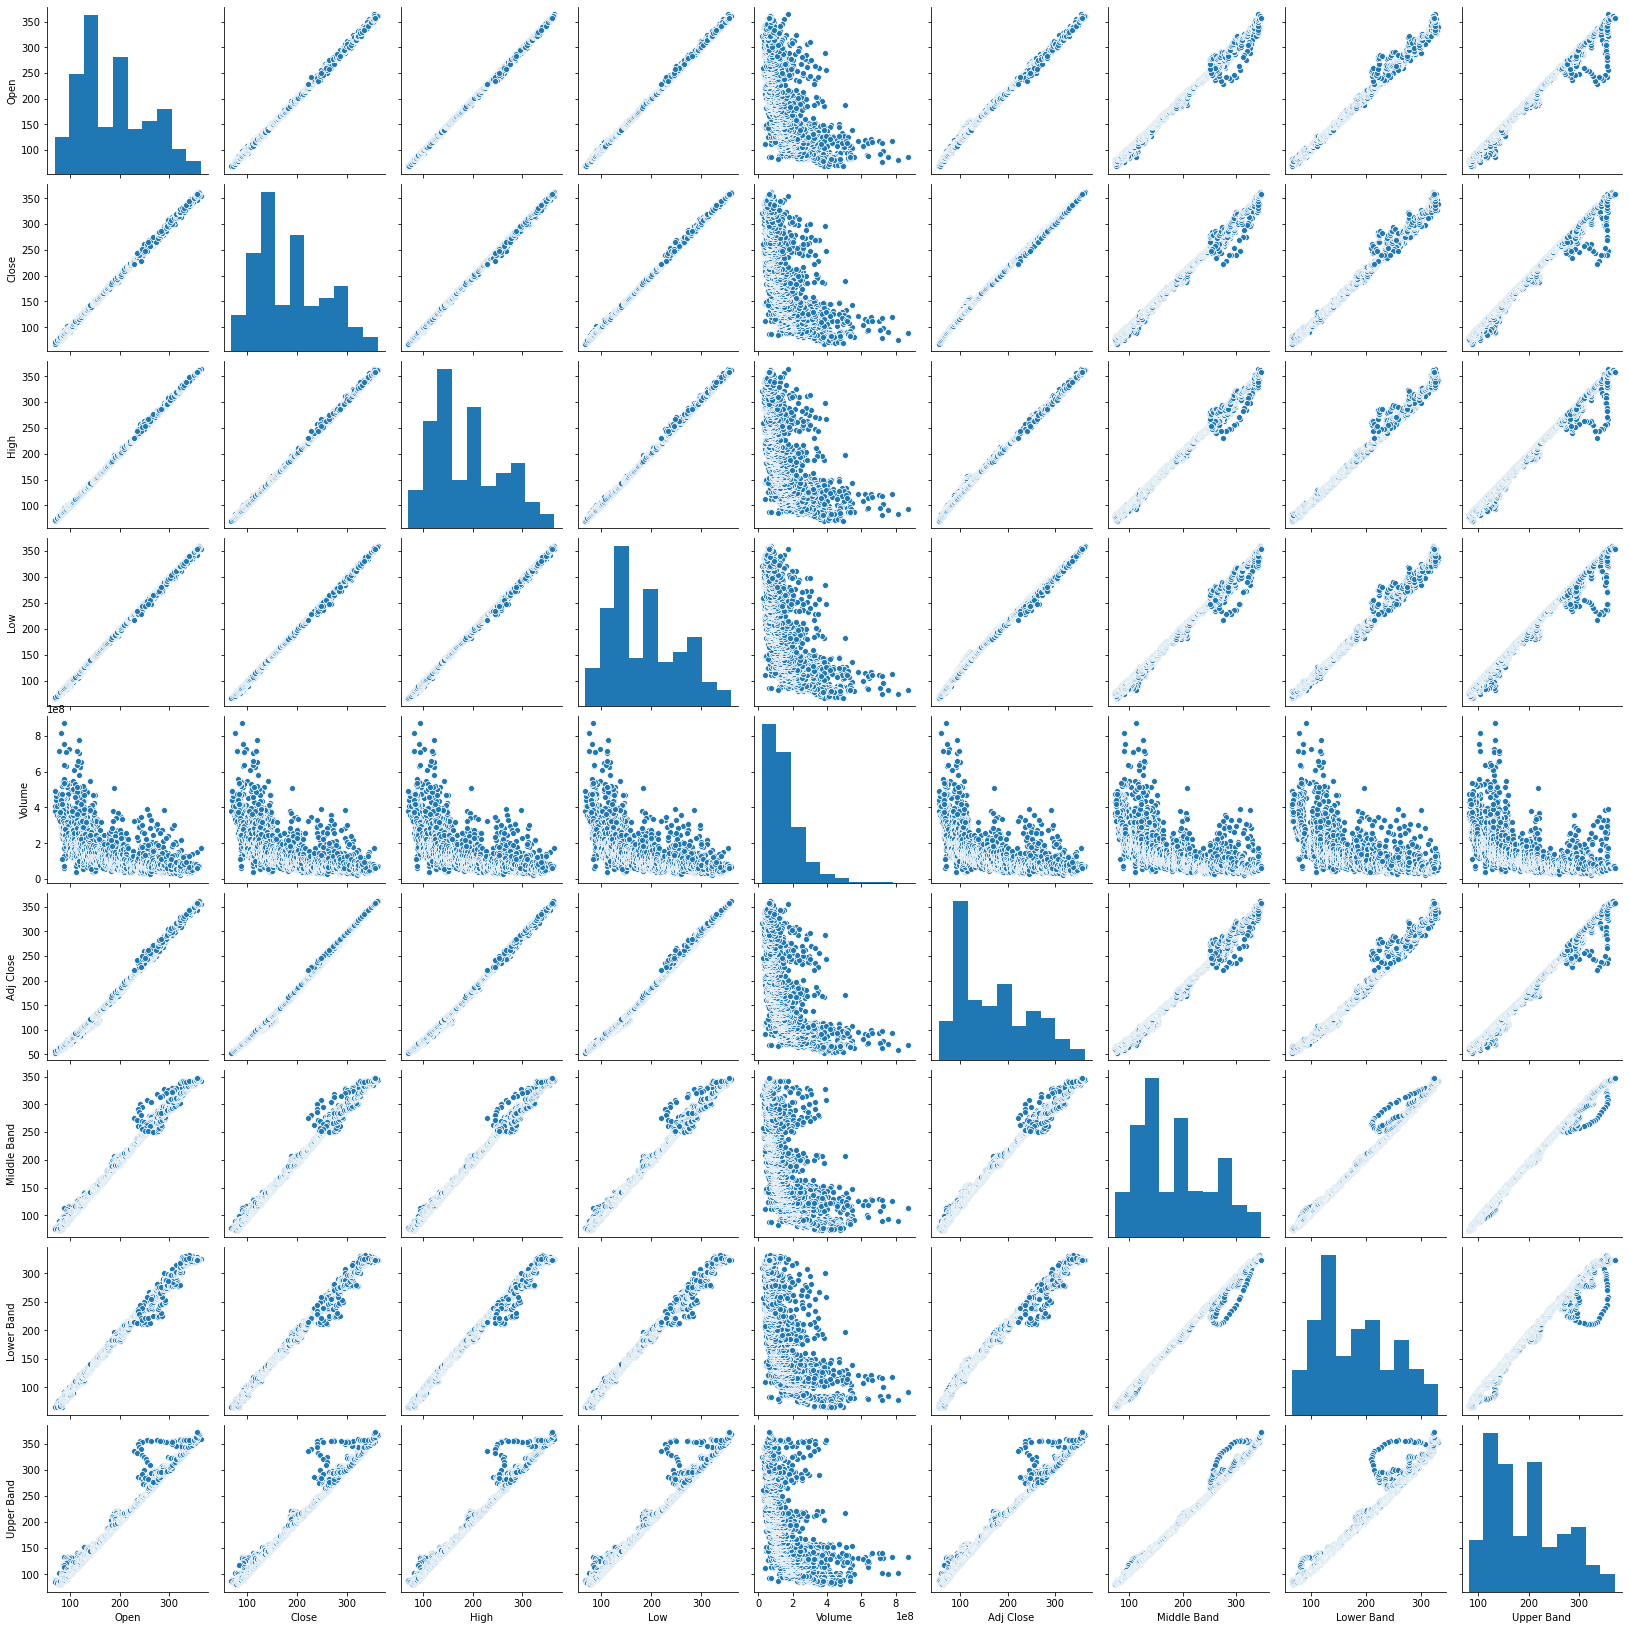

In [1682]:
sns.pairplot(df)

# Train Data

In [1683]:
from sklearn.model_selection import train_test_split

In [1684]:
X = df[['Open', 'Volume', 'High', 'Low', 'Adj Close', 'Middle Band', 'Lower Band', 'Upper Band']].values
X = X[20:-1]
X

array([[1.38779999e+02, 1.43333300e+08, 1.40119995e+02, ...,
        1.43466499e+02, 1.37872225e+02, 1.49060774e+02],
       [1.39589996e+02, 1.15144900e+08, 1.40460007e+02, ...,
        1.43199999e+02, 1.37396158e+02, 1.49003840e+02],
       [1.40539993e+02, 1.17891600e+08, 1.41160004e+02, ...,
        1.42976499e+02, 1.37155051e+02, 1.48797948e+02],
       ...,
       [3.60910004e+02, 7.05913000e+07, 3.61500000e+02, ...,
        3.45870003e+02, 3.23164654e+02, 3.68575351e+02],
       [3.55600006e+02, 5.99409000e+07, 3.58179993e+02, ...,
        3.46528503e+02, 3.23244635e+02, 3.69812372e+02],
       [3.57500000e+02, 7.04173000e+07, 3.57720001e+02, ...,
        3.47006003e+02, 3.23410111e+02, 3.70601894e+02]])

In [1685]:
y = df['Close'].values
y = y[21:]
y

array([139.55999756, 140.74000549, 140.77999878, ..., 357.77999878,
       355.32998657, 357.45999146])

In [1686]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1687]:
X_train.shape

(2419, 8)

In [1688]:
X_test.shape

(1037, 8)

In [1689]:
from sklearn.preprocessing import MinMaxScaler

In [1690]:
scaler = MinMaxScaler()

In [1691]:
scaler.fit(X_train)

MinMaxScaler()

In [1692]:
X_train = scaler.transform(X_train)

In [1693]:
X_test = scaler.transform(X_test)

In [1694]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1695]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [1696]:
model.fit(x=X_train, y=y_train, epochs=550)

Epoch 1/550
76/76 [==============================] - 0s 486us/step - loss: 40797.9062
Epoch 2/550
76/76 [==============================] - 0s 433us/step - loss: 40503.9023
Epoch 3/550
76/76 [==============================] - 0s 459us/step - loss: 40009.1289
Epoch 4/550
76/76 [==============================] - 0s 512us/step - loss: 39246.1133
Epoch 5/550
76/76 [==============================] - 0s 486us/step - loss: 38164.5547
Epoch 6/550
76/76 [==============================] - 0s 459us/step - loss: 36738.7148
Epoch 7/550
76/76 [==============================] - 0s 487us/step - loss: 34922.6602
Epoch 8/550
76/76 [==============================] - 0s 437us/step - loss: 32723.9512
Epoch 9/550
76/76 [==============================] - 0s 394us/step - loss: 30118.0020
Epoch 10/550
76/76 [==============================] - 0s 394us/step - loss: 27179.6914
Epoch 11/550
76/76 [==============================] - 0s 433us/step - loss: 23817.2754
Epoch 12/550
76/76 [==============================] 

76/76 [==============================] - 0s 446us/step - loss: 9.3112
Epoch 99/550
76/76 [==============================] - 0s 394us/step - loss: 9.3530
Epoch 100/550
76/76 [==============================] - 0s 459us/step - loss: 9.3471
Epoch 101/550
76/76 [==============================] - 0s 394us/step - loss: 9.2569
Epoch 102/550
76/76 [==============================] - 0s 420us/step - loss: 9.2680
Epoch 103/550
76/76 [==============================] - 0s 394us/step - loss: 9.1755
Epoch 104/550
76/76 [==============================] - 0s 394us/step - loss: 9.2347
Epoch 105/550
76/76 [==============================] - 0s 446us/step - loss: 9.2233
Epoch 106/550
76/76 [==============================] - 0s 459us/step - loss: 9.2268
Epoch 107/550
76/76 [==============================] - 0s 459us/step - loss: 9.2372
Epoch 108/550
76/76 [==============================] - 0s 458us/step - loss: 9.1770
Epoch 109/550
76/76 [==============================] - 0s 446us/step - loss: 9.2077
Epoch 1

76/76 [==============================] - 0s 459us/step - loss: 8.3830
Epoch 196/550
76/76 [==============================] - 0s 446us/step - loss: 8.2544
Epoch 197/550
76/76 [==============================] - 0s 446us/step - loss: 8.3388
Epoch 198/550
76/76 [==============================] - 0s 407us/step - loss: 8.3087
Epoch 199/550
76/76 [==============================] - 0s 381us/step - loss: 8.2956
Epoch 200/550
76/76 [==============================] - 0s 407us/step - loss: 8.2712
Epoch 201/550
76/76 [==============================] - 0s 499us/step - loss: 8.2767
Epoch 202/550
76/76 [==============================] - 0s 446us/step - loss: 8.2904
Epoch 203/550
76/76 [==============================] - 0s 459us/step - loss: 8.2675
Epoch 204/550
76/76 [==============================] - 0s 459us/step - loss: 8.2979
Epoch 205/550
76/76 [==============================] - 0s 420us/step - loss: 8.1990
Epoch 206/550
76/76 [==============================] - 0s 394us/step - loss: 8.2454
Epoch 

76/76 [==============================] - 0s 381us/step - loss: 7.6868
Epoch 293/550
76/76 [==============================] - 0s 407us/step - loss: 7.6417
Epoch 294/550
76/76 [==============================] - 0s 381us/step - loss: 7.6363
Epoch 295/550
76/76 [==============================] - 0s 381us/step - loss: 7.6419
Epoch 296/550
76/76 [==============================] - 0s 407us/step - loss: 7.6656
Epoch 297/550
76/76 [==============================] - 0s 367us/step - loss: 7.6740
Epoch 298/550
76/76 [==============================] - 0s 499us/step - loss: 7.6450
Epoch 299/550
76/76 [==============================] - 0s 407us/step - loss: 7.6541
Epoch 300/550
76/76 [==============================] - 0s 367us/step - loss: 7.6375
Epoch 301/550
76/76 [==============================] - 0s 381us/step - loss: 7.6312
Epoch 302/550
76/76 [==============================] - 0s 433us/step - loss: 7.5943
Epoch 303/550
76/76 [==============================] - 0s 394us/step - loss: 7.5993
Epoch 

76/76 [==============================] - 0s 407us/step - loss: 7.2729
Epoch 390/550
76/76 [==============================] - 0s 407us/step - loss: 7.2463
Epoch 391/550
76/76 [==============================] - 0s 407us/step - loss: 7.1817
Epoch 392/550
76/76 [==============================] - 0s 407us/step - loss: 7.1927
Epoch 393/550
76/76 [==============================] - 0s 367us/step - loss: 7.2024
Epoch 394/550
76/76 [==============================] - 0s 407us/step - loss: 7.2349
Epoch 395/550
76/76 [==============================] - 0s 433us/step - loss: 7.1627
Epoch 396/550
76/76 [==============================] - 0s 407us/step - loss: 7.2381
Epoch 397/550
76/76 [==============================] - 0s 415us/step - loss: 7.1411
Epoch 398/550
76/76 [==============================] - 0s 421us/step - loss: 7.1740
Epoch 399/550
76/76 [==============================] - 0s 433us/step - loss: 7.1671
Epoch 400/550
76/76 [==============================] - 0s 452us/step - loss: 7.2469
Epoch 

76/76 [==============================] - 0s 407us/step - loss: 6.9829
Epoch 487/550
76/76 [==============================] - 0s 381us/step - loss: 6.9320
Epoch 488/550
76/76 [==============================] - 0s 381us/step - loss: 6.9346
Epoch 489/550
76/76 [==============================] - 0s 394us/step - loss: 6.9324
Epoch 490/550
76/76 [==============================] - 0s 367us/step - loss: 6.9495
Epoch 491/550
76/76 [==============================] - 0s 381us/step - loss: 6.9716
Epoch 492/550
76/76 [==============================] - 0s 446us/step - loss: 6.9518
Epoch 493/550
76/76 [==============================] - 0s 407us/step - loss: 6.9350
Epoch 494/550
76/76 [==============================] - 0s 381us/step - loss: 6.9133
Epoch 495/550
76/76 [==============================] - 0s 433us/step - loss: 6.9425
Epoch 496/550
76/76 [==============================] - 0s 420us/step - loss: 6.9602
Epoch 497/550
76/76 [==============================] - 0s 381us/step - loss: 6.9310
Epoch 

# Inspect loss

In [1697]:
loss_df = pd.DataFrame(model.history.history)

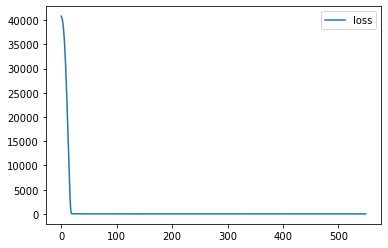

In [1698]:
loss_df.plot()

# Test Data

In [1699]:
# test result loss
model.evaluate(X_test, y_test, verbose=0)

6.3106689453125

In [1700]:
model.evaluate(X_train, y_train, verbose=0)

6.733076095581055

# Predictions

In [1701]:
test_predictions = model.predict(X_test)

In [1702]:
test_predictions = pd.Series(test_predictions.reshape(1037,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [1703]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [1704]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [1705]:
pred_df

,Test True Y,Model Predictions
0,186.309998,186.022476
1,152.619995,149.688599
2,147.910004,149.023788
3,266.000000,264.985779
4,205.830002,206.318069
...,...,...
1032,195.759995,194.541901
1033,195.720001,195.357224
1034,143.800003,144.612396
1035,241.710007,241.593002


In [1706]:
X_test

array([[0.39868281, 0.11888363, 0.39676116, ..., 0.41380172, 0.44417499,
        0.37581609],
       [0.27830398, 0.09504814, 0.27731095, ..., 0.27902971, 0.3077944 ,
        0.24759286],
       [0.27796448, 0.12182607, 0.27829756, ..., 0.26610186, 0.28018585,
        0.24876048],
       ...,
       [0.26262007, 0.32264046, 0.26302179, ..., 0.2844496 , 0.29646654,
        0.26833604],
       [0.58322299, 0.0514856 , 0.58391454, ..., 0.60732952, 0.64097689,
        0.55904614],
       [0.26272191, 0.12700264, 0.26101452, ..., 0.25461637, 0.27357896,
        0.23318308]])

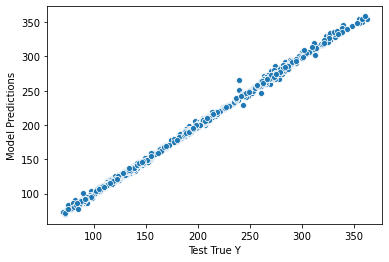

In [1707]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

# Predict next day by using previous day information

In [1708]:
start = pd.to_datetime('2020-01-30')
end = pd.to_datetime('2020-11-24')
new_day = data.DataReader('SPY', 'yahoo', start, end)
new_day['Middle Band'] = new_day['Close'].rolling(window=20).mean()
new_day['Lower Band'] = new_day['Middle Band'] - 1.96 * new_day['Close'].rolling(window=20).std()
new_day['Upper Band'] = new_day['Middle Band'] + 1.96 * new_day['Close'].rolling(window=20).std()
new_day.tail()

,High,Low,Open,Close,Volume,Adj Close,Middle Band,Lower Band,Upper Band
Date,,,,,,,,,
2020-11-18,361.500000,356.239990,360.910004,356.279999,70591300.0,356.279999,345.870003,323.164654,368.575351
2020-11-19,358.179993,354.149994,355.600006,357.779999,59940900.0,357.779999,346.528503,323.244635,369.812372
2020-11-20,357.720001,355.250000,357.500000,355.329987,70417300.0,355.329987,347.006003,323.410111,370.601894
2020-11-23,358.820007,354.869995,357.279999,357.459991,63230600.0,357.459991,347.909502,324.164315,371.654689
2020-11-24,363.809998,359.290009,360.209991,363.220001,62415900.0,363.220001,349.159502,324.953549,373.365455


In [1709]:
new_day_X = new_day[['Open', 'Volume', 'High', 'Low', 'Adj Close', 'Middle Band', 'Lower Band', 'Upper Band']].values
new_day_X

array([[3.24359985e+02, 7.54918000e+07, 3.27910004e+02, ...,
                   nan,            nan,            nan],
       [3.27000000e+02, 1.13845600e+08, 3.27170013e+02, ...,
                   nan,            nan,            nan],
       [3.23350006e+02, 6.92423000e+07, 3.26160004e+02, ...,
                   nan,            nan,            nan],
       ...,
       [3.57500000e+02, 7.04173000e+07, 3.57720001e+02, ...,
        3.47006003e+02, 3.23410111e+02, 3.70601894e+02],
       [3.57279999e+02, 6.32306000e+07, 3.58820007e+02, ...,
        3.47909502e+02, 3.24164315e+02, 3.71654689e+02],
       [3.60209991e+02, 6.24159000e+07, 3.63809998e+02, ...,
        3.49159502e+02, 3.24953549e+02, 3.73365455e+02]])

In [1710]:
yesterday_X = new_day.iloc[-2]
yesterday_X = yesterday_X[['Open', 'Volume', 'High', 'Low', 'Adj Close', 'Middle Band', 'Lower Band', 'Upper Band']].values
yesterday_X = [yesterday_X]
yesterday_X

[array([3.57279999e+02, 6.32306000e+07, 3.58820007e+02, 3.54869995e+02,
        3.57459991e+02, 3.47909502e+02, 3.24164315e+02, 3.71654689e+02])]

In [1711]:
new_day_Y = new_day.iloc[-1]
new_day_Y = new_day_Y[['Close']].values

In [1712]:
new_day_Y

array([363.22000122])

In [1713]:
yesterday_X = scaler.transform(yesterday_X)

model.predict(yesterday_X)

array([[355.3577]], dtype=float32)